In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch.multiprocessing as mp

In [28]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
train_csv=pd.read_csv(r"C:\Users\Public\Documents\PYTORCH_NOTEBOOKS\Data\Apple\train.csv")
test_csv=pd.read_csv(r"C:\Users\Public\Documents\PYTORCH_NOTEBOOKS\Data\Apple\test.csv")

In [30]:

train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.RandomPerspective(),
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        #transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])


In [31]:
root = r"C:\Users\Public\Documents\PYTORCH_NOTEBOOKS\Data\Apple\images\test_train"
train_data = datasets.ImageFolder(os.path.join(root, 'Train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'Test'), transform=test_transform)
eval_data=datasets.ImageFolder(os.path.join(root, 'eval'), transform=test_transform)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)
eval_loader=DataLoader(eval_data, batch_size=10)
class_names=train_data.classes


In [32]:
for images, labels in train_loader:
    break


images


tensor([[[[ 0.8104,  0.7933,  0.7933,  ...,  0.1768, -0.0287, -0.0287],
          [ 0.7248,  0.7248,  0.7419,  ...,  0.1768,  0.0227,  0.0398],
          [ 0.7419,  0.7762,  0.8104,  ...,  0.1939,  0.0569,  0.1083],
          ...,
          [ 0.0741,  0.1254,  0.1597,  ..., -0.5082, -0.5082, -0.5253],
          [ 0.0912,  0.1083,  0.1254,  ..., -0.5082, -0.5767, -0.5938],
          [ 0.1426,  0.0741,  0.0569,  ..., -0.6281, -0.7137, -0.7137]],

         [[ 0.8529,  0.8354,  0.8354,  ...,  0.1877, -0.0224, -0.0224],
          [ 0.7654,  0.7654,  0.7829,  ...,  0.1877,  0.0301,  0.0476],
          [ 0.7829,  0.8179,  0.8529,  ...,  0.2052,  0.0651,  0.1176],
          ...,
          [ 0.0651,  0.1176,  0.1527,  ..., -0.5826, -0.5826, -0.6001],
          [ 0.0826,  0.1001,  0.1176,  ..., -0.5826, -0.6527, -0.6702],
          [ 0.1352,  0.0651,  0.0476,  ..., -0.7052, -0.7927, -0.7927]],

         [[ 1.2805,  1.2631,  1.2631,  ...,  0.5485,  0.3393,  0.3393],
          [ 1.1934,  1.1934,  

Label: [3 3 0 3 3 2 1 0 3 2]
Class: scab scab healthy scab scab rust multiple healthy scab rust


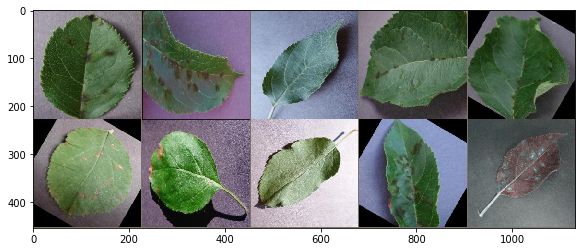

In [33]:
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))


im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [336]:
#n — image size, f — filter size, p —used padding, s — used stride, nf — number of filters.



[224.0, 224.0, 32]

In [153]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1,1)
       # self.conv2 = nn.Conv2d(32, 32, 3, 1,1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1,1)
       # self.conv4 = nn.Conv2d(64, 64, 3, 1,1)
        self.bn16=nn.BatchNorm2d(16)
        self.bn32 = nn.BatchNorm2d(32)
        self.bn64 = nn.BatchNorm2d(64)
        self.bn128 = nn.BatchNorm2d(128)
        self.drop2= nn.Dropout(p=0.5)
        self.drop1= nn.Dropout(p=0.25)
        self.fc1= nn.Linear(56*56*64,512)
        self.fc2= nn.Linear(512,256)
        self.fc3= nn.Linear(256,128)
        self.fc4= nn.Linear(128,4)
        #[(n+2p-f/s)+1]*[(n+2p-f/s)+1]*n_f
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = self.bn32(X)
        X = F.max_pool2d(X, 2, 2)
        X = self.drop1(X)       
        """
        X = F.relu(self.conv2(X))
        X = self.bn32(X)
        X = F.max_pool2d(X, 2, 2)
        X = self.drop1(X) 
        """  
        X = F.relu(self.conv3(X))
        X = self.bn64(X)
        X = F.max_pool2d(X, 2, 2)
        X = self.drop1(X) 
        """"
        X = F.relu(self.conv4(X))     
        X = self.bn64(X)
        X = F.max_pool2d(X, 2, 2)
        """
    
        X = X.view(-1, 56*56*64)
        
        X = F.relu(self.fc1(X))
        X = self.drop2(X) 
        X = F.relu(self.fc2(X))
        X = self.drop2(X) 
        X = F.relu(self.fc3(X))
        X = self.drop2(X) 
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

 

In [154]:

CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)


In [155]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')




In [156]:

count_parameters(CNNmodel)

     864
      32
   18432
      64
      16
      16
      32
      32
      64
      64
     128
     128
102760448
     512
  131072
     256
   32768
     128
     512
       4
________
102945572


In [157]:




import time
start_time = time.time()

epochs =10


max_trn_batch = 890
max_tst_batch = 250

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):

        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1

        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%100 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{b*10:6}/8900]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')#ndata/10,nbtch/ndata,nbatch/10

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {(time.time() - start_time)/60:.0f} minutes') # print the time elapsed

epoch:  0  batch:  100 [  1000/8900]  loss: 3.24055290  accuracy:  41.600%
epoch:  0  batch:  200 [  2000/8900]  loss: 2.04718041  accuracy:  44.400%
epoch:  0  batch:  300 [  3000/8900]  loss: 0.39991778  accuracy:  47.067%
epoch:  0  batch:  400 [  4000/8900]  loss: 0.89943969  accuracy:  49.325%
epoch:  0  batch:  500 [  5000/8900]  loss: 0.76405740  accuracy:  51.560%
epoch:  0  batch:  600 [  6000/8900]  loss: 0.64150417  accuracy:  53.450%
epoch:  0  batch:  700 [  7000/8900]  loss: 0.44841304  accuracy:  56.057%
epoch:  0  batch:  800 [  8000/8900]  loss: 0.67758000  accuracy:  57.962%
epoch:  1  batch:  100 [  1000/8900]  loss: 0.20826671  accuracy:  80.000%
epoch:  1  batch:  200 [  2000/8900]  loss: 0.66883266  accuracy:  78.450%
epoch:  1  batch:  300 [  3000/8900]  loss: 0.69318646  accuracy:  78.900%
epoch:  1  batch:  400 [  4000/8900]  loss: 0.40143386  accuracy:  79.500%
epoch:  1  batch:  500 [  5000/8900]  loss: 0.30073225  accuracy:  80.080%
epoch:  1  batch:  600 [ 

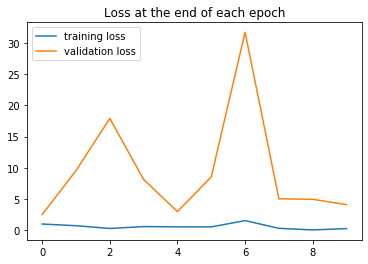

In [158]:

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')

plt.legend();

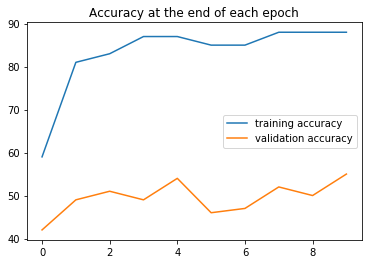

In [159]:
plt.plot([t/89 for t in train_correct], label='training accuracy')
plt.plot([t/25 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [160]:
print(test_correct[-1].item())
print(f'Test accuracy: {test_correct[-1].item()*100/2500:.3f}%')

1387
Test accuracy: 55.480%


In [161]:
torch.save(CNNmodel.state_dict(), 'HealthyApples.pt')

In [162]:
model2=ConvolutionalNetwork()

model2.load_state_dict(torch.load('HealthyApples.pt'));
model2.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn16): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn32): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn64): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn128): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=200704, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=4, bias=True)
)

In [172]:
AlexNetmodel = models.alexnet(pretrained=True)
AlexNetmodel


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [173]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 4),
                                 nn.LogSoftmax(dim=1))
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [174]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)


In [175]:
import time
start_time = time.time()

epochs = 2

max_trn_batch = 900
max_tst_batch = 200

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%10 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/1000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:   10 [   100/1000]  loss: 5.73615837  accuracy:  44.000%
epoch:  0  batch:   20 [   200/1000]  loss: 1.80239272  accuracy:  56.500%
epoch:  0  batch:   30 [   300/1000]  loss: 0.42238933  accuracy:  61.333%
epoch:  0  batch:   40 [   400/1000]  loss: 0.57247192  accuracy:  65.750%
epoch:  0  batch:   50 [   500/1000]  loss: 0.22556248  accuracy:  69.800%
epoch:  0  batch:   60 [   600/1000]  loss: 0.67056394  accuracy:  73.333%
epoch:  0  batch:   70 [   700/1000]  loss: 0.27212965  accuracy:  76.429%
epoch:  0  batch:   80 [   800/1000]  loss: 0.86951339  accuracy:  78.000%
epoch:  0  batch:   90 [   900/1000]  loss: 0.66133219  accuracy:  78.889%
epoch:  0  batch:  100 [  1000/1000]  loss: 0.01587368  accuracy:  80.600%
epoch:  0  batch:  110 [  1100/1000]  loss: 0.00972335  accuracy:  82.091%
epoch:  0  batch:  120 [  1200/1000]  loss: 0.05483664  accuracy:  82.750%
epoch:  0  batch:  130 [  1300/1000]  loss: 0.03887212  accuracy:  83.231%
epoch:  0  batch:  140 [ 

epoch:  1  batch:  220 [  2200/1000]  loss: 0.10132633  accuracy:  96.136%
epoch:  1  batch:  230 [  2300/1000]  loss: 0.00086523  accuracy:  96.087%
epoch:  1  batch:  240 [  2400/1000]  loss: 0.01086541  accuracy:  96.125%
epoch:  1  batch:  250 [  2500/1000]  loss: 0.00453055  accuracy:  96.040%
epoch:  1  batch:  260 [  2600/1000]  loss: 0.62551779  accuracy:  96.115%
epoch:  1  batch:  270 [  2700/1000]  loss: 0.06801970  accuracy:  96.222%
epoch:  1  batch:  280 [  2800/1000]  loss: 0.00130352  accuracy:  96.321%
epoch:  1  batch:  290 [  2900/1000]  loss: 0.26196054  accuracy:  96.241%
epoch:  1  batch:  300 [  3000/1000]  loss: 0.00605508  accuracy:  96.333%
epoch:  1  batch:  310 [  3100/1000]  loss: 0.00271165  accuracy:  96.355%
epoch:  1  batch:  320 [  3200/1000]  loss: 0.00042922  accuracy:  96.406%
epoch:  1  batch:  330 [  3300/1000]  loss: 0.70596063  accuracy:  96.394%
epoch:  1  batch:  340 [  3400/1000]  loss: 0.00071506  accuracy:  96.353%
epoch:  1  batch:  350 [ 

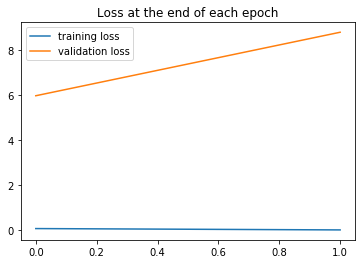

In [176]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')

plt.legend();

In [178]:
print(test_correct[-1].item())
print(f'Test accuracy: {test_correct[-1].item()*100/2500:.3f}%')

1365
Test accuracy: 54.600%


In [163]:


sub=[]


for i in range(len(eval_data)):
     with torch.no_grad():
            y_eval = CNNmodel(eval_data[i][0].view(1,3,224,224))
            sub.append(np.exp(y_eval.numpy()))

                
        
   
            
     

       
   
 



    

   
            
         
        
            
    
    


In [165]:
sub=pd.DataFrame(np.concatenate(sub))


In [166]:
sub

,0,1,2,3
0,6.590618e-07,1.778372e-08,1.642508e-07,0.999999
1,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
2,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
3,9.693085e-01,5.652743e-05,1.382303e-02,0.016812
4,6.561019e-02,3.468218e-02,1.622083e-01,0.737499
...,...,...,...,...
1816,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
1817,3.585414e-16,1.224900e-28,1.928998e-17,1.000000
1818,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
1819,7.909868e-02,1.606924e-01,6.192846e-02,0.698280


In [167]:


sub["image_id"]=test_csv["image_id"]

In [168]:
sub = sub[["image_id",0,1,2,3]]

In [169]:
sub=sub.rename(columns={0:"healthy" ,1:"multiple_diseases", 2:"rust", 3:"scab"})
sub

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,6.590618e-07,1.778372e-08,1.642508e-07,0.999999
1,Test_1,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
2,Test_2,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
3,Test_3,9.693085e-01,5.652743e-05,1.382303e-02,0.016812
4,Test_4,6.561019e-02,3.468218e-02,1.622083e-01,0.737499
...,...,...,...,...,...
1816,Test_1816,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
1817,Test_1817,3.585414e-16,1.224900e-28,1.928998e-17,1.000000
1818,Test_1818,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
1819,Test_1819,7.909868e-02,1.606924e-01,6.192846e-02,0.698280


In [170]:
sub=sub.rename(columns={0:"healthy" ,1:"multiple_diseases", 2:"rust", 3:"scab"})
sub

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,6.590618e-07,1.778372e-08,1.642508e-07,0.999999
1,Test_1,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
2,Test_2,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
3,Test_3,9.693085e-01,5.652743e-05,1.382303e-02,0.016812
4,Test_4,6.561019e-02,3.468218e-02,1.622083e-01,0.737499
...,...,...,...,...,...
1816,Test_1816,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
1817,Test_1817,3.585414e-16,1.224900e-28,1.928998e-17,1.000000
1818,Test_1818,2.171228e-01,2.352162e-01,1.745853e-01,0.373076
1819,Test_1819,7.909868e-02,1.606924e-01,6.192846e-02,0.698280


In [171]:
sub.to_csv(r"C:\Users\Public\Documents\PYTORCH_NOTEBOOKS\Data\Apple\Submission.csv",index=False)